# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***. 

👇 Run the cell below to load the preprocessed dataset from the *previous challenge 1 - Preprocessing Workflow*.

In [1]:
import pandas as pd

# Run this cell if you 
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,0.500000,0.866025
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,0.866025,-0.500000
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-0.866025,-0.500000
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,0.500000,0.866025
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-0.500000,0.866025


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

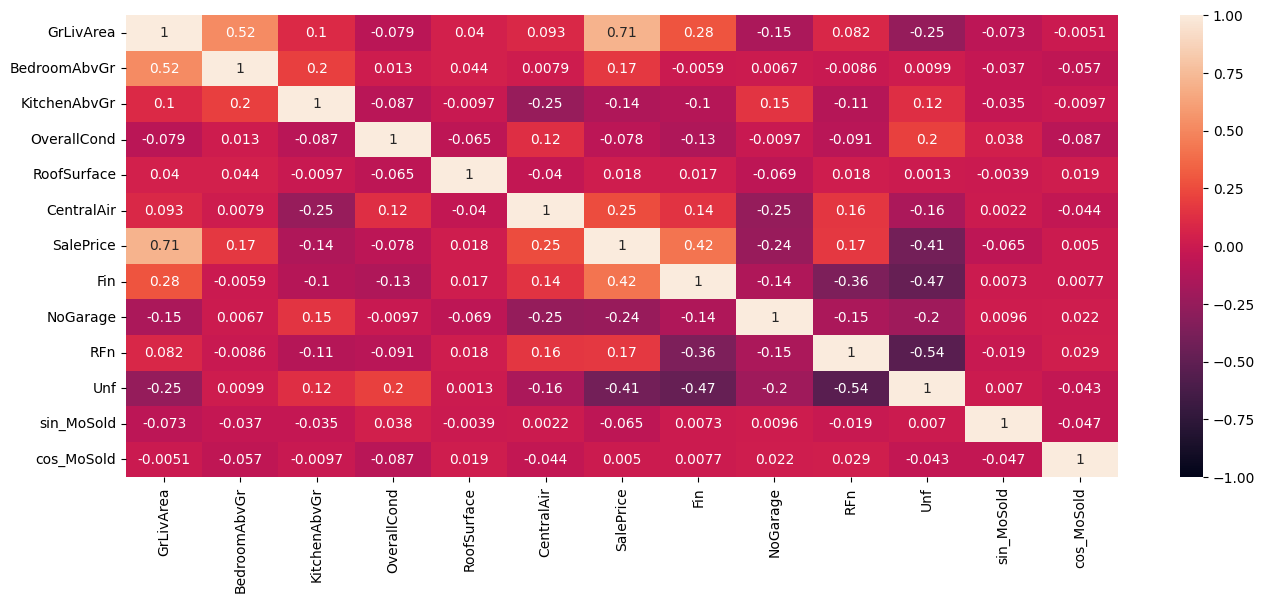

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)

❓ Visualize the correlation between column pairs in a dataframe ❓

In [3]:
# YOUR CODE HERE

❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [4]:
correlated_features = 0

🧪 **Test your code**

In [5]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/diogo/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/diogo/code/diogoalex97/data-feature-selection/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [6]:
data1 = data.copy()
data1.drop(['SalePrice'], axis=1)
X= data1
y= data["SalePrice"]

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [11]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
lasso = linear_model.Lasso()
base_model_score = cross_validate(lasso, X, y, cv=3)
base_model_score = base_model_score["test_score"].mean()


🧪 **Test your code**

In [12]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/diogo/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/diogo/code/diogoalex97/data-feature-selection/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [23]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X= data[["GrLivArea","BedroomAbvGr","KitchenAbvGr","OverallCond","RoofSurface","CentralAir","Fin","NoGarage","RFn","Unf","sin_MoSold","cos_MoSold"]]
y= data["SalePrice"]

# Fit model
log_model = LogisticRegression().fit(X, y) 

# Performs Permutation
permutation_score = permutation_importance(log_model, X, y, n_repeats=12) 

# Unstack results showing the decrease in performance after shuffling features
importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']

# Show the important features
importance_df.sort_values(by="score decrease", ascending = False) 

,feature,score decrease
0,GrLivArea,0.017295
9,Unf,0.009589
11,cos_MoSold,0.009018
5,CentralAir,0.006221
8,RFn,0.005651
6,Fin,0.005194
10,sin_MoSold,0.004909
4,RoofSurface,0.004795
3,OverallCond,0.00274
7,NoGarage,0.001998


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [24]:
best_feature = "GrLivArea"

🧪 **Test your code**

In [25]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/diogo/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/diogo/code/diogoalex97/data-feature-selection/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one. 
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [43]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate

X= data[["GrLivArea","BedroomAbvGr","KitchenAbvGr","OverallCond","CentralAir","Fin","Unf","cos_MoSold"]]
y= data["SalePrice"]

lasso = linear_model.Lasso()
base_model_score = cross_validate(lasso, X, y, cv=3)
simplified_model_score = base_model_score["test_score"].mean()

simplified_model_score

0.6306325949262372

🧪 **Test your code**

In [41]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/diogo/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/diogo/code/diogoalex97/data-feature-selection/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master



P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!